# Algoritmo ICA

✓ Señales originales generadas
  Dimensiones: (2000, 3)

✓ Señales mezcladas
  Matriz de mezcla:
[[1.  1.  1. ]
 [0.5 2.  1. ]
 [1.5 1.  2. ]]

✓ ICA completado en 6 iteraciones


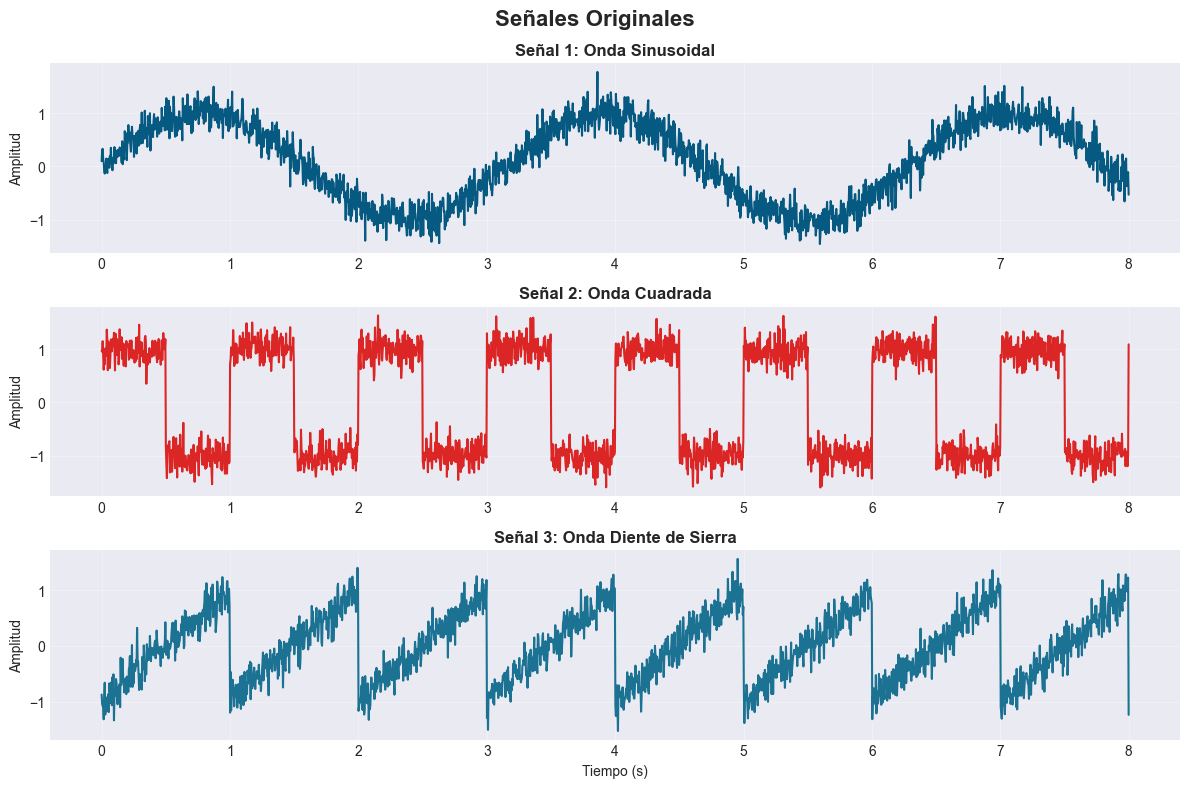

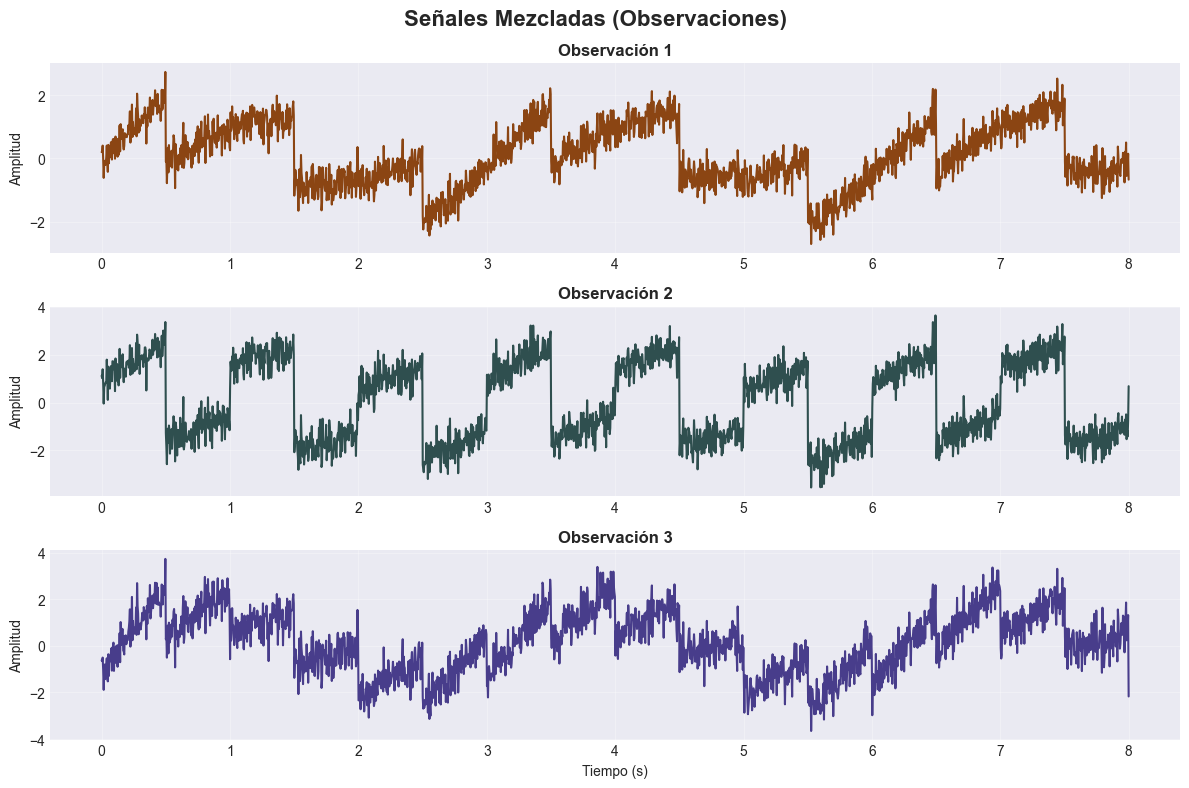

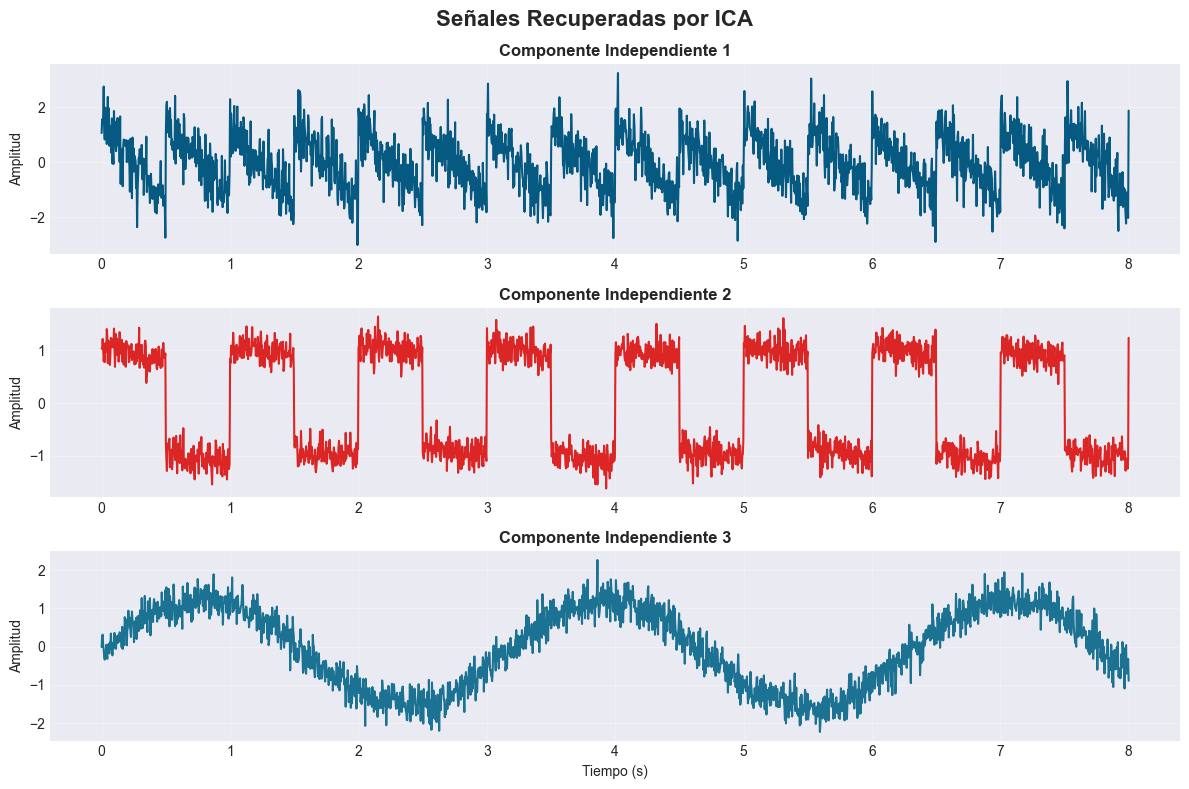

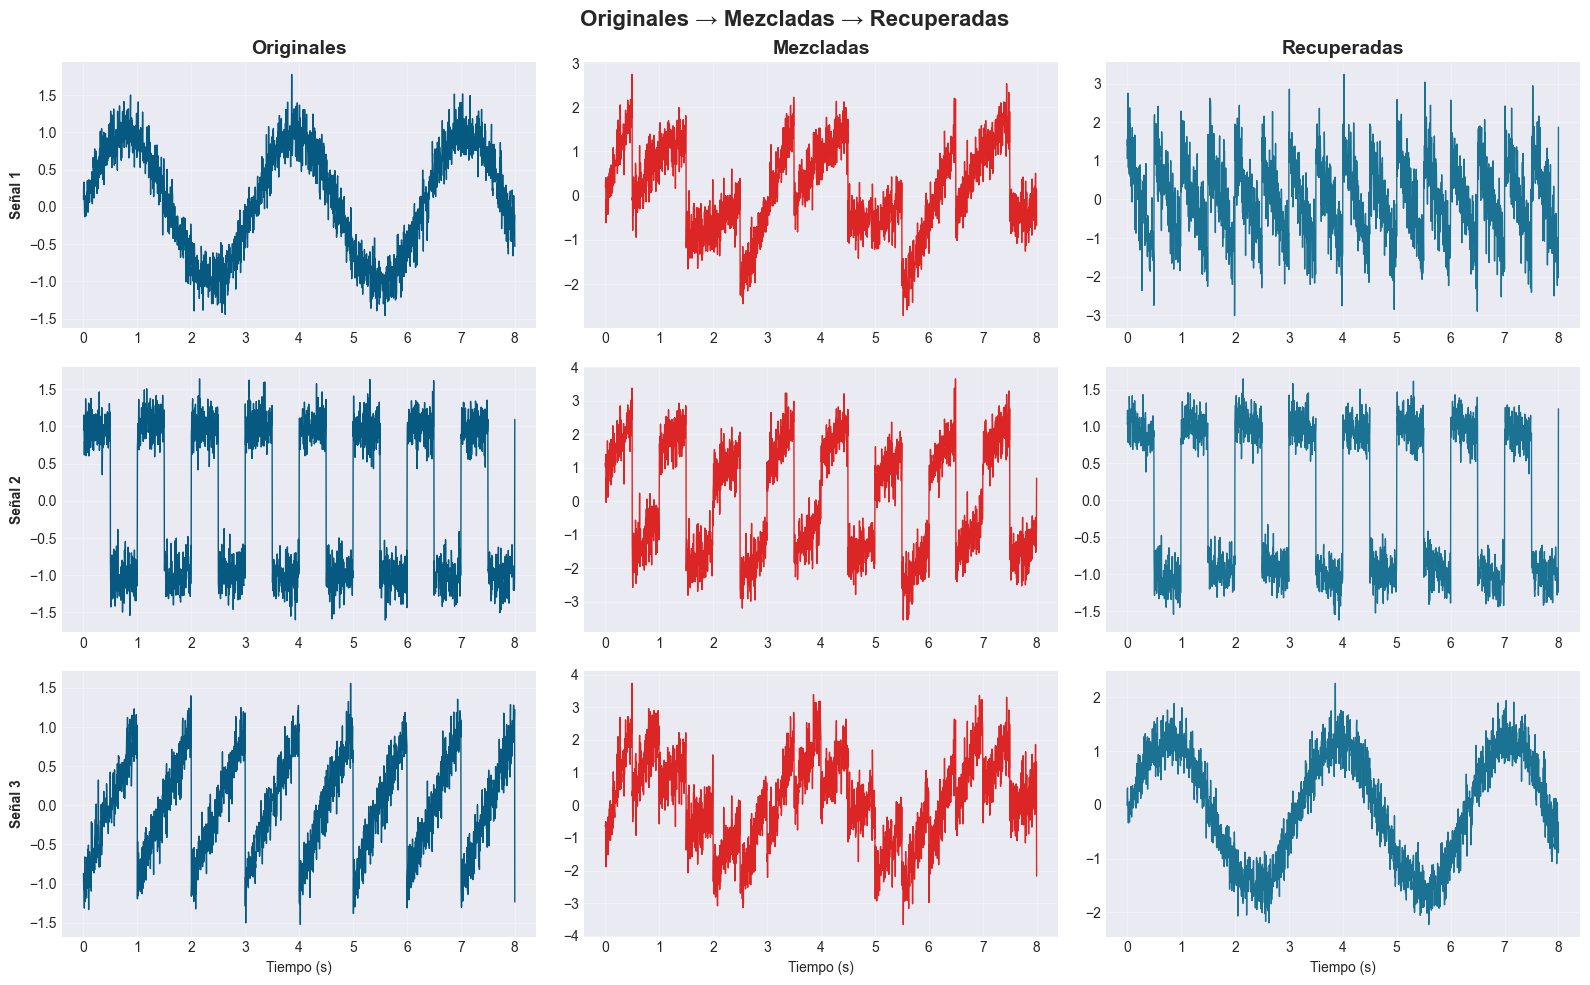


ESTADÍSTICAS

Señales Originales:
     Señal     Media  Desv. Std    Mínimo   Máximo
Original 1  0.120250   0.721136 -1.458623 1.776794
Original 2 -0.005020   1.017591 -1.601526 1.638622
Original 3  0.005117   0.605013 -1.522409 1.557573

Señales Mezcladas:
     Señal    Media  Desv. Std    Mínimo   Máximo
Mezclada 1 0.120347   0.971840 -2.712392 2.742609
Mezclada 2 0.055202   1.637291 -3.548179 3.646811
Mezclada 3 0.185589   1.307093 -3.653007 3.729552

Señales Recuperadas:
       Señal        Media  Desv. Std    Mínimo   Máximo
Recuperada 1 1.232792e-15        1.0 -3.013230 3.246261
Recuperada 2 3.339551e-16        1.0 -1.620991 1.644143
Recuperada 3 5.826450e-16        1.0 -2.228846 2.261175

CORRELACIÓN

             Recuperada 1  Recuperada 2  Recuperada 3
Original 1         0.015         0.034         0.999
Original 2         0.064         0.997         0.040
Original 3         0.551         0.834         0.023


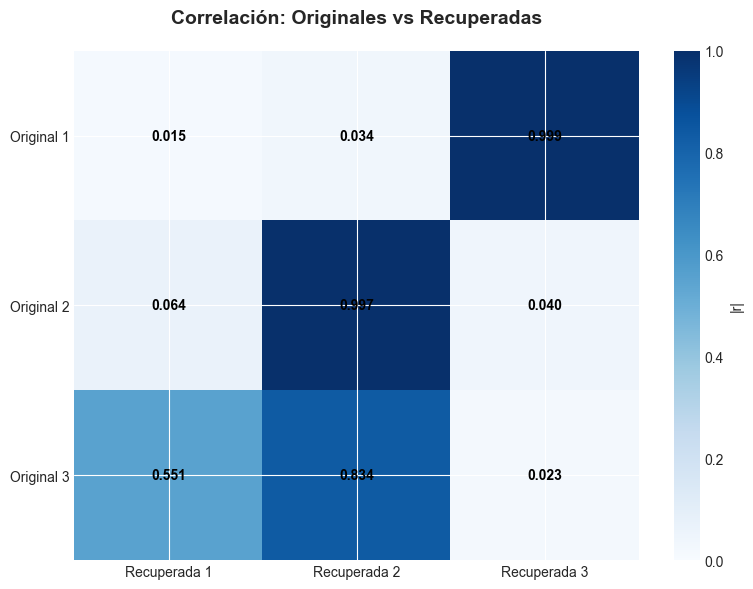


 Análisis ICA completado


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy import signal
import pandas as pd

# Configuración visual
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

# -
# 1. GENERAR SEÑALES ORIGINALES
# -

n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Tres tipos diferentes de ondas
s1 = np.sin(2 * time)                      # Onda sinusoidal
s2 = signal.square(2 * np.pi * time)       # Onda cuadrada
s3 = signal.sawtooth(2 * np.pi * time)     # Onda diente de sierra

# Combinar y añadir ruido realista
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)

print("✓ Señales originales generadas")
print(f"  Dimensiones: {S.shape}")

#-
# 2. MEZCLAR LAS SEÑALES
# -

# Matriz de mezcla (simula 3 micrófonos captando 3 fuentes)
A = np.array([[1, 1, 1], 
              [0.5, 2, 1.0], 
              [1.5, 1.0, 2.0]])

X = np.dot(S, A.T)  # Señales mezcladas

print("\n✓ Señales mezcladas")
print(f"  Matriz de mezcla:\n{A}")

# -
# 3. APLICAR ICA
# -

ica = FastICA(n_components=3, random_state=42, max_iter=1000)
S_recovered = ica.fit_transform(X)

print(f"\n✓ ICA completado en {ica.n_iter_} iteraciones")

# -
# 4. VISUALIZACIÓN
# -
colores_originales = ['#065A82', '#DC2626', '#1C7293']
colores_mezcladas = ['#8B4513', '#2F4F4F', '#483D8B']

# --- Gráfico 1: Señales Originales ---
fig1, axes1 = plt.subplots(3, 1, figsize=(12, 8))
fig1.suptitle('Señales Originales', fontsize=16, fontweight='bold')

nombres = ['Onda Sinusoidal', 'Onda Cuadrada', 'Onda Diente de Sierra']

for i, (ax, nombre) in enumerate(zip(axes1, nombres)):
    ax.plot(time, S[:, i], linewidth=1.5, color=colores_originales[i])
    ax.set_title(f'Señal {i+1}: {nombre}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Amplitud')
    ax.grid(alpha=0.3)
    if i == 2:
        ax.set_xlabel('Tiempo (s)')

plt.tight_layout()
plt.savefig('ica_originales.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Gráfico 2: Señales Mezcladas ---
fig2, axes2 = plt.subplots(3, 1, figsize=(12, 8))
fig2.suptitle('Señales Mezcladas (Observaciones)', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes2):
    ax.plot(time, X[:, i], linewidth=1.5, color=colores_mezcladas[i])
    ax.set_title(f'Observación {i+1}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Amplitud')
    ax.grid(alpha=0.3)
    if i == 2:
        ax.set_xlabel('Tiempo (s)')

plt.tight_layout()
plt.savefig('ica_mezcladas.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Gráfico 3: Señales Recuperadas ---
fig3, axes3 = plt.subplots(3, 1, figsize=(12, 8))
fig3.suptitle('Señales Recuperadas por ICA', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes3):
    ax.plot(time, S_recovered[:, i], linewidth=1.5, color=colores_originales[i])
    ax.set_title(f'Componente Independiente {i+1}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Amplitud')
    ax.grid(alpha=0.3)
    if i == 2:
        ax.set_xlabel('Tiempo (s)')

plt.tight_layout()
plt.savefig('ica_recuperadas.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Gráfico 4: Comparación Completa ---
fig4, axes4 = plt.subplots(3, 3, figsize=(16, 10))
fig4.suptitle('Originales → Mezcladas → Recuperadas', fontsize=16, fontweight='bold')

# Columna 1: Originales
for i in range(3):
    axes4[i, 0].plot(time, S[:, i], linewidth=1, color='#065A82')
    axes4[i, 0].set_ylabel(f'Señal {i+1}', fontweight='bold')
    axes4[i, 0].grid(alpha=0.3)
    if i == 0:
        axes4[i, 0].set_title('Originales', fontweight='bold', fontsize=14)
    if i == 2:
        axes4[i, 0].set_xlabel('Tiempo (s)')

# Columna 2: Mezcladas
for i in range(3):
    axes4[i, 1].plot(time, X[:, i], linewidth=1, color='#DC2626')
    axes4[i, 1].grid(alpha=0.3)
    if i == 0:
        axes4[i, 1].set_title('Mezcladas', fontweight='bold', fontsize=14)
    if i == 2:
        axes4[i, 1].set_xlabel('Tiempo (s)')

# Columna 3: Recuperadas
for i in range(3):
    axes4[i, 2].plot(time, S_recovered[:, i], linewidth=1, color='#1C7293')
    axes4[i, 2].grid(alpha=0.3)
    if i == 0:
        axes4[i, 2].set_title('Recuperadas', fontweight='bold', fontsize=14)
    if i == 2:
        axes4[i, 2].set_xlabel('Tiempo (s)')

plt.tight_layout()
plt.savefig('ica_comparacion.png', dpi=300, bbox_inches='tight')
plt.show()

# -
# 5. ESTADÍSTICAS
# -

# Crear tablas
stats_original = pd.DataFrame({
    'Señal': ['Original 1', 'Original 2', 'Original 3'],
    'Media': [S[:, i].mean() for i in range(3)],
    'Desv. Std': [S[:, i].std() for i in range(3)],
    'Mínimo': [S[:, i].min() for i in range(3)],
    'Máximo': [S[:, i].max() for i in range(3)]
})

stats_mezcladas = pd.DataFrame({
    'Señal': ['Mezclada 1', 'Mezclada 2', 'Mezclada 3'],
    'Media': [X[:, i].mean() for i in range(3)],
    'Desv. Std': [X[:, i].std() for i in range(3)],
    'Mínimo': [X[:, i].min() for i in range(3)],
    'Máximo': [X[:, i].max() for i in range(3)]
})

stats_recuperadas = pd.DataFrame({
    'Señal': ['Recuperada 1', 'Recuperada 2', 'Recuperada 3'],
    'Media': [S_recovered[:, i].mean() for i in range(3)],
    'Desv. Std': [S_recovered[:, i].std() for i in range(3)],
    'Mínimo': [S_recovered[:, i].min() for i in range(3)],
    'Máximo': [S_recovered[:, i].max() for i in range(3)]
})

print("\n" + "="*60)
print("ESTADÍSTICAS")
print("="*60)
print("\nSeñales Originales:")
print(stats_original.to_string(index=False))
print("\nSeñales Mezcladas:")
print(stats_mezcladas.to_string(index=False))
print("\nSeñales Recuperadas:")
print(stats_recuperadas.to_string(index=False))

# -
# 6. MATRIZ DE CORRELACIÓN
# -

correlaciones = np.abs(np.corrcoef(S.T, S_recovered.T)[:3, 3:])

print("\n" + "="*60)
print("CORRELACIÓN")
print("="*60)

corr_df = pd.DataFrame(
    correlaciones,
    index=['Original 1', 'Original 2', 'Original 3'],
    columns=['Recuperada 1', 'Recuperada 2', 'Recuperada 3']
)
print("\n", corr_df.round(3))

# Visualizar correlación
fig5, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(correlaciones, cmap='Blues', aspect='auto', vmin=0, vmax=1)

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['Recuperada 1', 'Recuperada 2', 'Recuperada 3'])
ax.set_yticklabels(['Original 1', 'Original 2', 'Original 3'])

for i in range(3):
    for j in range(3):
        ax.text(j, i, f'{correlaciones[i, j]:.3f}',
                ha="center", va="center", color="black", fontweight='bold')

ax.set_title('Correlación: Originales vs Recuperadas', 
             fontsize=14, fontweight='bold', pad=20)
plt.colorbar(im, ax=ax, label='|r|')
plt.tight_layout()
plt.savefig('ica_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Análisis ICA completado")